In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

sns.set()

Using TensorFlow backend.


In [2]:
#data = pd.read_csv('A_Z Handwritten Data.csv')
#df=data

In [8]:
#df.rename(columns={'0':'label'}, inplace=True)

In [11]:
#data = df.sample(n=20000)

In [12]:
data.to_csv("out.csv")

In [18]:
data['label'].value_counts()

14    3086
18    2640
20    1478
2     1280
19    1192
15    1062
13    1043
12     722
0      685
22     608
11     602
17     599
4      578
24     564
3      540
1      468
9      461
7      416
23     339
25     338
16     321
6      308
10     295
21     241
5       75
8       59
Name: label, dtype: int64

In [20]:
# Splite data the X - Our data , and y - the prdict label
X = data.drop('label',axis = 1)
y = data['label']

In [21]:
print("shape:",X.shape)
print("culoms count:",len(X.iloc[1]))
print("784 = 28X28")


shape: (20000, 784)
culoms count: 784
784 = 28X28


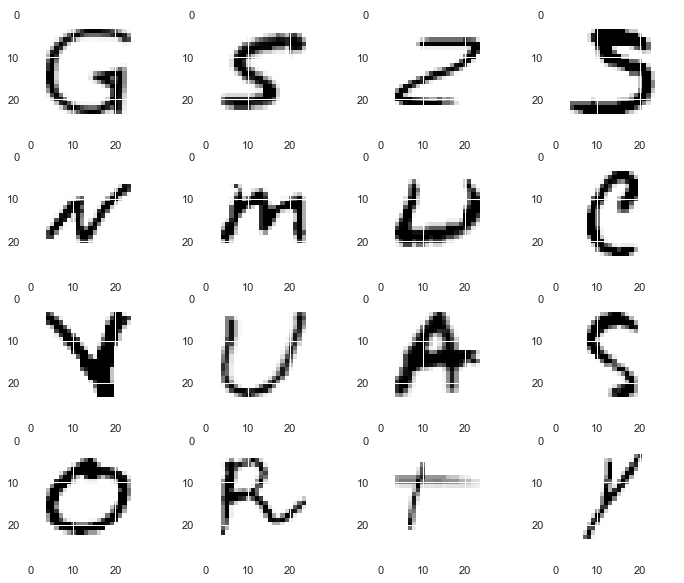

In [22]:
from sklearn.utils import shuffle

X_shuffle = shuffle(X)

plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle.iloc[i].values.reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

Amount of each labels


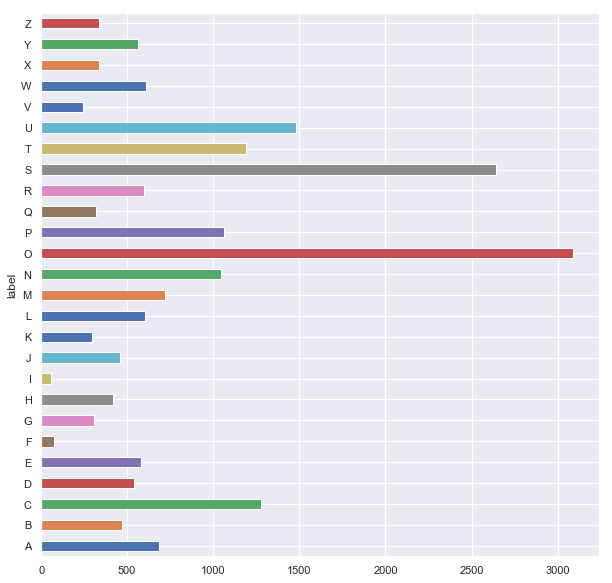

We have very low observations for I and F 
I count: 59
F count: 75


In [24]:
print("Amount of each labels")

# Change label to alphabets
alphabets_mapper = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'} 
dataset_alphabets = data.copy()
data['label'] = data['label'].map(alphabets_mapper)

label_size = data.groupby('label').size()
label_size.plot.barh(figsize=(10,10))
plt.show()

print("We have very low observations for I and F ")
print("I count:", label_size['I'])
print("F count:", label_size['F'])

In [25]:
# splite the data
X_train, X_test, y_train, y_test = train_test_split(X,y)

# scale data
standard_scaler = MinMaxScaler()
standard_scaler.fit(X_train)

X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

Data after scaler


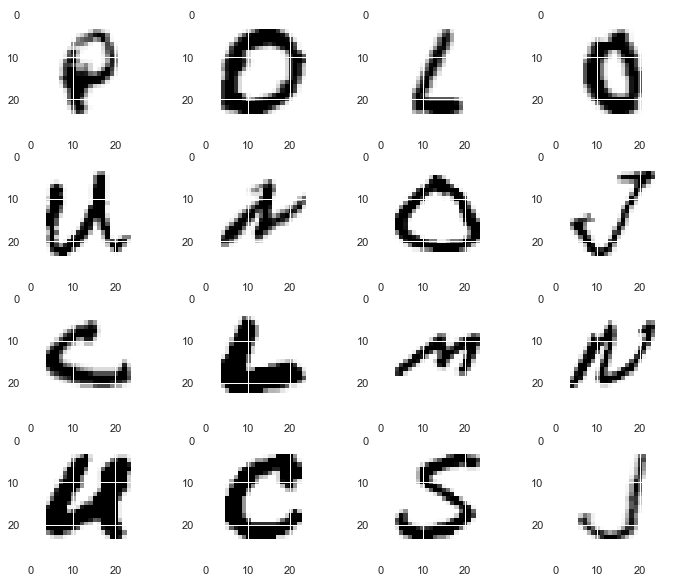

In [26]:
print("Data after scaler")
X_shuffle = shuffle(X_train)

plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle[i].reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

In [27]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [28]:
cls = Sequential()
cls.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
cls.add(MaxPooling2D(pool_size=(2, 2)))
cls.add(Dropout(0.3))
cls.add(Flatten())
cls.add(Dense(128, activation='relu'))
cls.add(Dense(len(y.unique()), activation='softmax'))

cls.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = cls.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=18, batch_size=200, verbose=2)

scores = cls.evaluate(X_test,y_test, verbose=0)
print("CNN Score:",scores[1])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 5000 samples
Epoch 1/18
 - 20s - loss: 1.1896 - acc: 0.6687 - val_loss: 0.5153 - val_acc: 0.8596
Epoch 2/18
 - 18s - loss: 0.4260 - acc: 0.8787 - val_loss: 0.3244 - val_acc: 0.9138
Epoch 3/18
 - 23s - loss: 0.2888 - acc: 0.9180 - val_loss: 0.2546 - val_acc: 0.9318
Epoch 4/18
 - 22s - loss: 0.2195 - acc: 0.9403 - val_loss: 0.2198 - val_acc: 0.9388
Epoch 5/18
 - 18s - loss: 0.1688 - acc: 0.9529 - val_loss: 0.2010 - val_acc: 0.9438
Epoch 6/18
 - 20s - loss: 0.1462 - acc: 0.9600 - val_loss: 0.1931 - val_acc: 0.9440
Epoch 7/18
 - 20s - loss: 0.1197 - acc: 0.9655 - val_loss: 0.1592 - val_acc: 0.9552
Epoch 8/18
 - 17s - loss: 0.0968 - acc: 0.9739 - val_loss: 0.1624 - val_acc: 0.9552
Epoch 9/18
 - 18s - loss: 0.0851 - acc: 0.97

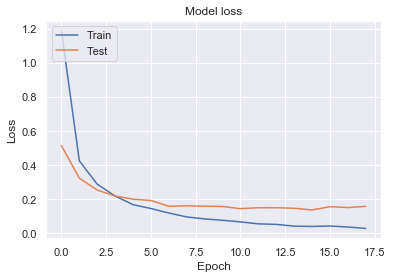

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

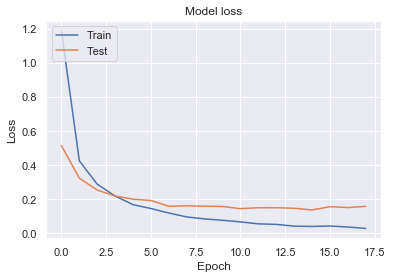

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

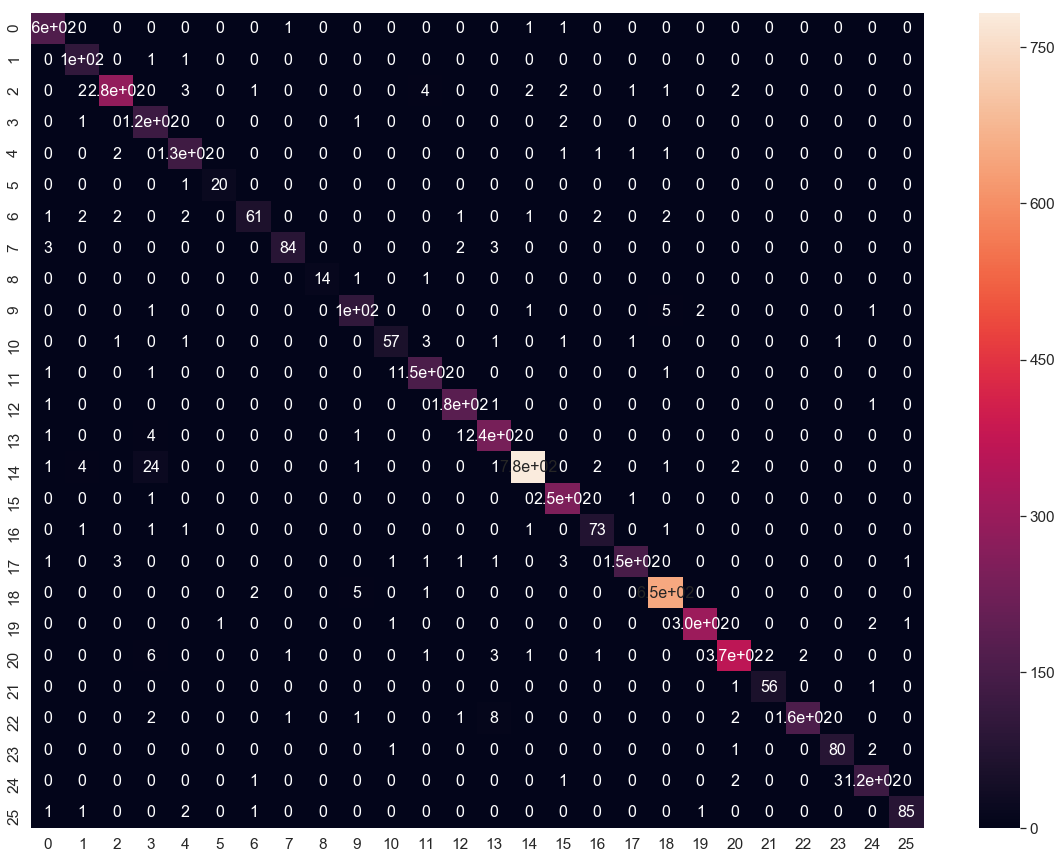

In [31]:
cm=confusion_matrix(y_test.argmax(axis=1),cls.predict(X_test).argmax(axis=1))
df_cm = pd.DataFrame(cm, range(26),
                  range(26))
plt.figure(figsize = (20,15))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size